## Figure 2 (MOI vs read depth for screens using same promoter for both Many and One steps of sequential screen)

In [1]:
import sys
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
print (sys.version)

3.9.7 (default, Sep 16 2021, 13:09:58) 
[GCC 7.5.0]


In [3]:
scipy.__version__

'1.7.3'

In [4]:
poisson_MOI_list = [0.1, 0.3, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

df_poisson = pd.DataFrame(poisson_MOI_list, columns=['MOI'])
df_poisson['fraction_atleast1_inf'] = df_poisson['MOI'].apply(lambda x:scipy.stats.poisson.sf(0,x,loc=0))

# The "many" CRISPR screen was performed at a MOI of 0.3
expected_value_moi_screen = 0.3/(1-math.exp(-0.3))

# Determine the fraction of total reads that originate from the "many" screen when using LCv2-U6 for the "one" at various MOIs.
df_poisson['fraction_reads_screen_U6'] = df_poisson['MOI'].apply(lambda x: expected_value_moi_screen/(expected_value_moi_screen+(x/(1-math.exp(-x)))))

# LCv2-7SK is not amplified by the amplification primers, so when 7SK is used for the "ONE" it does not reduce the fraction of "many" reads
df_poisson['fraction_reads_screen_7SK'] = 1

In [5]:
df_poisson

,MOI,fraction_atleast1_inf,fraction_reads_screen_U6,fraction_reads_screen_7SK
0,0.1,0.095163,0.524149,1
1,0.3,0.259182,0.500000,1
2,0.5,0.393469,0.476679,1
3,1.0,0.632121,0.422524,1
4,2.0,0.864665,0.333520,1
5,3.0,0.950213,0.268268,1
6,4.0,0.981684,0.221228,1
7,5.0,0.993262,0.186951,1
8,6.0,0.997521,0.161381,1
9,7.0,0.999088,0.141782,1


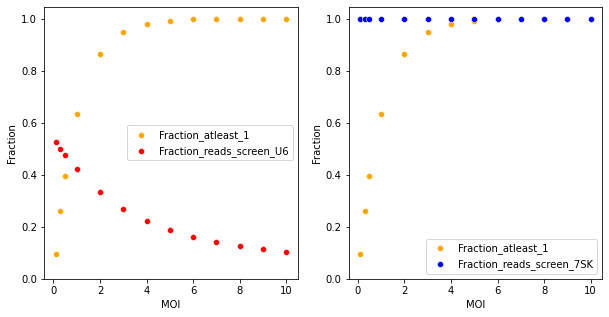

In [6]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
sns.scatterplot(ax=axes[0], data=df_poisson, x='MOI', y='fraction_atleast1_inf', label='Fraction_atleast_1', **{'facecolor':'orange'})
sns.scatterplot(ax=axes[0],data=df_poisson, x='MOI', y='fraction_reads_screen_U6', label='Fraction_reads_screen_U6', **{'facecolor':'red'})

sns.scatterplot(ax=axes[1], data=df_poisson, x='MOI', y='fraction_atleast1_inf', label='Fraction_atleast_1', **{'facecolor':'orange'})
sns.scatterplot(ax=axes[1],data=df_poisson, x='MOI', y='fraction_reads_screen_7SK', label='Fraction_reads_screen_7SK', **{'facecolor':'blue'})

axes[0].set_ylim(0,)
axes[1].set_ylim(0,)

axes[0].set_ylabel('Fraction')
axes[1].set_ylabel('Fraction')

# This will produce a vector format image that can be used in Inkscape/Illustrator to change colors/label font/etc.
plt.savefig('Figure2.svg')